# Relatório UNIBRAZIL

Por Victor Calefi Ramos (587230) e Felipe Churuyuki Chinen (496235)

## Introdução

A grande empresa multinacional UNIBRAZIL pretende dividir a gerencia da empresa em submarcas mais especializadas, de forma que cada marca irá se especializar nos produtos que interessam ao seu grupo de clientes.

O objetivo deste trabalho é auxiliar os donos/gestores da empresa durante todo o processo: escolha de quantas marcas a empresa será dividida; definir a porcentagem de clientes que ficará sob a bandeira de cada marca; levantar um perfil de compra dos clientes para cada uma das novas marcas. Tudo isso deve ser pensado levando em conta os custos de um processo de divisão de uma empresa, como custos com gerenciamento, publicidade e funcionários especializados.

## Inicialização

Para o processo de análise de perfil de compra dos clientes da empresa foram disponibilizados dados de compra de 1.000.000 de clientes.

Toda a análise feita em cima desses clientes deverá servir como base para futuros clientes da empresa (novos clientes podem ter um perfil de compra parecido com o perfil de compra de um cliente já analisado).

**Importante:** devido à limitação de hardware disponível para processamento dos 1.000.000 de dados dos clientes, optamos por trabalhar com uma amostragem de 10% dos dados, somente assim seria possível processar os dados em tempo hábil.

In [1]:
# Biblioteca NumPy para manipulação de dados
import numpy as np
# Biblioteca Pandas para manipulação de dados
import pandas as pd
# Biblioteca MatPlotLib para manipulação de gráficos
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
# Biblioteca para pré processamento dos dados
from sklearn.decomposition import PCA
# Biblioteca com algoritmos de clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Biblioteca com os algoritmos para silhueta
from sklearn.metrics import silhouette_samples

# Localização do arquivo
filepath = 'clientes.csv'
# Importanto os dados para um dataFrame
data = pd.read_csv(filepath, sep = ',')
# Sampling 10%
data = data.sample(frac = .1)

## Pré-processamento

A etapa de pré-processamento dos dados nos ajuda a entender os atributos dos dados e seus valores, bem como a correlação entre dados.

- Verificamos se os dados foram carregados corretamente;
- Verificamos a disposição dos dados a fim de tentar identificar erros;

In [2]:
# Amostragem de objetos do dataset
display(data)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
130049,59,6,393,61,4,519,49,4,788,48
752879,65,4,413,69,5,556,39,3,741,48
254112,75,3,568,37,4,510,29,6,758,51
493218,64,7,789,80,5,505,74,5,353,65
120083,68,6,424,59,5,519,42,4,736,45
771469,60,4,458,62,6,572,41,3,696,48
477188,68,6,852,75,5,488,73,4,322,67
45596,59,6,395,65,4,549,43,3,700,50
737246,65,4,394,72,6,595,37,3,762,54
581543,73,7,739,85,5,556,71,4,355,66


In [3]:
# Verificando como estão os dados
data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,58.820930,4.89539,595.518970,55.81328,4.954160,471.020560,51.011460,4.729080,638.498540,46.655150
std,17.130475,1.31007,155.420342,16.20100,0.998513,101.981488,14.707241,1.933773,166.569009,12.679415
min,7.000000,2.00000,245.000000,15.00000,2.000000,91.000000,18.000000,1.000000,192.000000,9.000000
25%,58.000000,4.00000,438.000000,40.00000,4.000000,412.000000,39.000000,3.000000,567.000000,41.000000
50%,65.000000,4.00000,619.000000,59.00000,5.000000,491.000000,48.000000,4.000000,692.000000,47.000000
75%,70.000000,6.00000,735.000000,70.00000,6.000000,546.000000,63.000000,6.000000,770.000000,53.000000
max,92.000000,8.00000,933.000000,96.00000,8.000000,750.000000,89.000000,10.000000,931.000000,82.000000


Pela descrição dos dados acima podemos concluir que não existem erros relacionados aos valores dos atributos. Portanto, podemos continuar com a análise.

### Distribuição dos dados

Agora poderemos tirar conclusões a respeito do perfil de compra geral da empresa.

Analisando a distribuição dos dados em relação a cada produto vendido pela empresa, podemos identificar padrões e/ou perfis de consumo dos clientes.

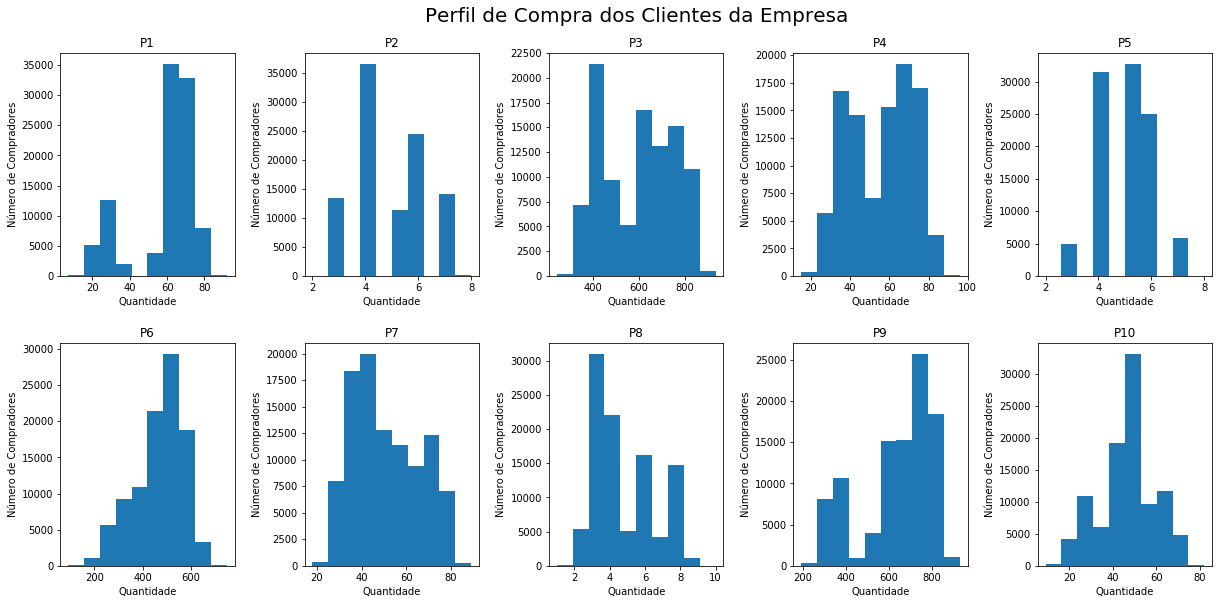

In [4]:
# Histogramam de distribuição geral dos dados
plt.figure(figsize = (20, 8))
for i in range (1, 11):
    plt.subplot(2, 5, i)
    plt.hist(data['P' + str(i)])
    plt.xlabel('Quantidade')
    plt.ylabel('Número de Compradores')
    plt.title('P' + str(i))
plt.suptitle('Perfil de Compra dos Clientes da Empresa', size = 20) 
plt.subplots_adjust(top = 0.9, bottom = 0.01, left = 0.1, right = 0.9, hspace = 0.3, wspace = 0.4)
plt.show()

**Conclusões iniciais sobre o perfil de compra dos clientes:**

- Cerca de 35% dos clientes tendem a comprar aproximadamente de 60 a 70 unidades do produto P1, sendo a média aproximadamente 60 unidades;
- Cerca de 35% dos clientes tendem a comprar 4 unidades do produto P2, sendo a média aproximadamente 5 unidades;
- Cerca de 22% dos clientes tendem a comprar aproximadamente 400 unidades do produto P3, sendo a média aproximadamente 595 unidades; 
- Cerca de 15% a 20% dos clientes tendem a comprar aproximadamente de 30 a 40 ou de 60 a 80 unidades do produto P4, sendo a média aproximadamente 55 unidades;
- Cerca de 25 a 30% dos clientes tendem a comprar 4, 5 ou 6 unidades do produto P5, sendo a média aproximadamente 5 unidades;
- Cerca de 30% dos clientes tendem a comprar aproximadamente 500 unidades do produto P6, sendo a média aproximadamente 471 unidades;
- Cerca de 20% dos clientes tendem a comprar aproximadamente 40 unidades do produto P7, sendo a média aproximadamente 51 unidades;
- Cerca de 30% dos clientes tendem a comprar aproximadamente 3 unidades do produto P8, sendo a média aproximadamente 5 unidades;
- Cerca de 25% dos clientes tendem a comprar aproximadamente 770 unidades do produto P9, sendo a média aproximadamente 640 unidades;
- Cerca de 30% dos clientes tendem a comprar aproximadamente 53 unidades do produto P10, sendo a média aproximadamente 46 unidades;

### Mapa de Correlação

Sabendo como os clientes se comportam em relação as vendas dos produtos, agora podemos saber como os produtos se correlacionam em relação as suas vendas.

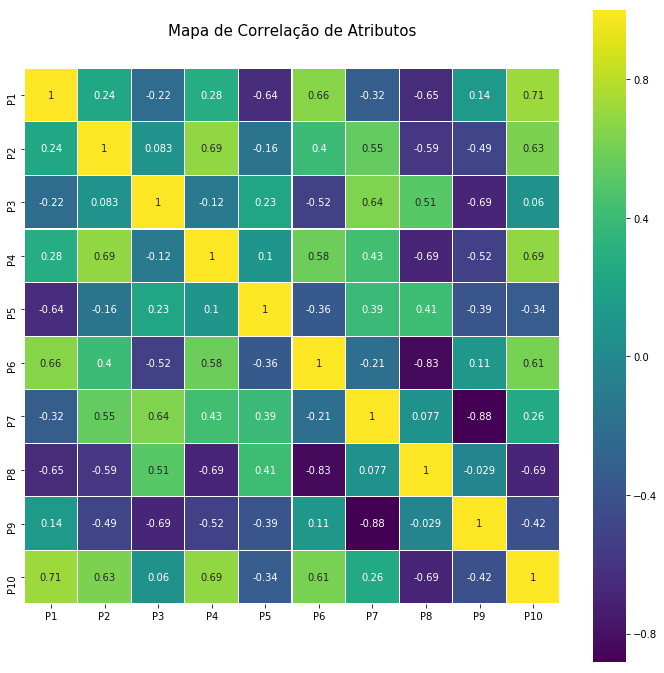

In [5]:
# Mapa de Correlação
colormap = plt.cm.viridis
plt.figure(figsize = (12, 12))
plt.title('Mapa de Correlação de Atributos', y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

Se tratarmos o limiar de correlação acima de 0.8 como sendo ALTA, podemos observar que nenhum par de produtos se enquadra. Entretanto, é interessante observar que os produtos que mais se correlacionam são: P1 e P6, P1 e P10, P2 e P4, P2 e P10, P3 e P7, P4 e P10, P6 e P10.
Com isso, podemos talvez inferir que um aumento na venda de um produto pode influenciar num aumento da venda do seu respectivo par (citado acima).

Por outro lado, se observarmos um limiar de correlação negativo podemos ver que os produtos P6 e P8 e também os produtos P7 e P9 estão extremamente não correlacionados, isto é, pode ser que um aumento na venda de um produto pode influenciar numa diminuição da venda do seu respectivo par.

### PCA

Para conseguirmos visualizar melhor os dados iremos diminuir a dimensão de representação para 2d, a fim de gerar um plano que represente o mais fielmente possivel o "agrupamento" dos dados.

Text(0.5, 1.0, 'Distribuição dos Dados - Componentes Principais 1 e 2')

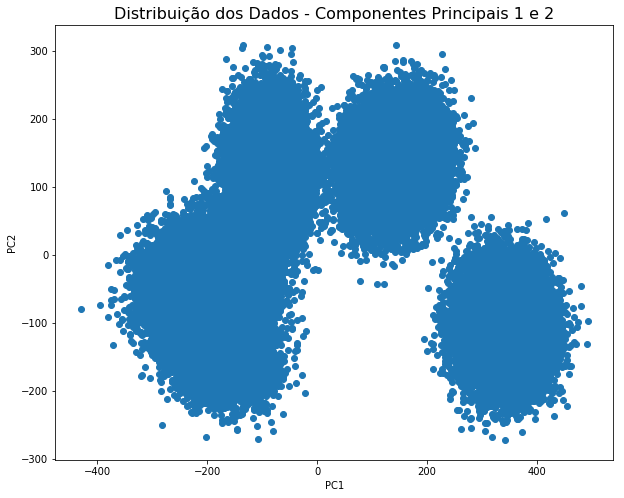

In [6]:
# Aplica PCA para uma melhor visualização dos dados
pca_data = PCA(n_components = 2).fit_transform(data)

# Plota os dados em relação às duas componentes
plt.figure(figsize = (10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos Dados - Componentes Principais 1 e 2', size = 16)

A primeira impressão que temos é de que os dados estão bem separados, sendo possiveis grupos à direita (formas globulares) e 2 possiveis grupos à esquerda (formas globulares com sobreposição). Essa separação natural dos dados é um bom sinal, pois os grupos gerados por algoritmos de agrupamento tendem a ser mais comportados.

## Agrupamento (Clustering)

Tendo em mente que os dados parecem estar separados em 4 grupos com formatos globulares, iremos agora aplicar 2 algoritmos de agrupamento distintos, juntamente com um processo de validação, a fim de selecionar a partição que mais se adequa à solução do problema de divisão de marcas por especialidade.

Algoritmos/métodos de agrupamento escolhidos: KMeans e Aglomerativo (justificativas abaixo).

### Métodos

Antes de iniciarmos o processo de agrupamento própriamente dito, iremos definir 2 métodos que serão utilizados mais a frente como forma de modularizar o código aumentar a compreensão do mesmo.

Teremos 1 método para pegar os valores de index originais de cada objeto que foi particionado e 1 método para pegar esses objetos dos dados originais utilizando esses valores de index.

In [7]:
# Retorna uma nparray contendo os indices de cada objeto do cluster
def getClusterIndices(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

# Retorna um dataframe contendo os objetos do cluster
def getClusterData(dataset, cluster_indices):
    return pd.DataFrame(dataset.iloc[cluster_indices])

### KMeans

A escolha do método de agrupamento KMeans foi feita por 2 motivos principais: formato globular dos dados, que podem beneficiar o algoritmo; pouca presença de *outliers*, que também pode beneficiar o algoritmo.

#### Descobrindo o valor ideal de K

Primeiramente iremos avaliar a tendência da qualidade das partições do KMeans de acordo com o número de grupos.

Iremos variar o número de grupos de 2 a 10, salvar o melhor J (indice interno) e então selecionar o melhor número de grupos baseado na tendência de J.

Text(0.5, 1.0, 'Tendência de J')

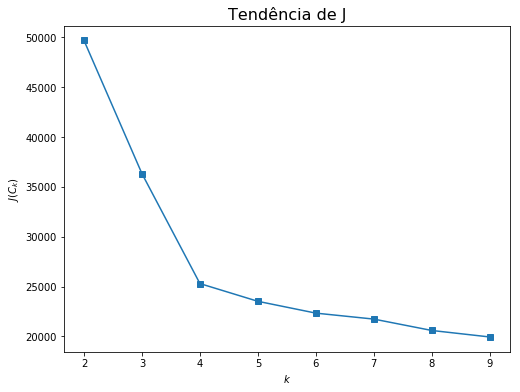

In [8]:
# Calcula KMeans variando o valor de K
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++').fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))
    
# Plota Tendência de J
plt.figure(figsize = (8, 6))
plt.plot(range(2, 10), inertia, marker = 's')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.title('Tendência de J', size = 16)

Como J tende a ter melhoras pouco significativas a partir de 4 grupos ("joelho" do gráfico nos indica o K ideal) iremos trabalhar com uma partição de 4 grupos (empresa seria dividida em 4 novas marcas), avaliar a qualidade dessa partição e então traçar um perfil de compras para os clientes de cada partição.

#### Gerando o modelo com 4 grupos (K = 4)

Abaixo geramos uma partição com 4 grupos utilizando KMeans e verificamos a parcentagem dos clientes que foram alocados em cada grupo.

In [9]:
######################## Apenas para visualização #############################
# Transforma os dados usando PCA
local_data_with_pca = PCA(n_components = 2).fit_transform(data)
# Aplica KMeans com K = 4 Grupos (dados com pca)
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++').fit(local_data_with_pca)
###############################################################################

# Aplica KMeans com K = 4 Grupos (dados sem pca)
kmeans = KMeans(n_clusters = 4, init = 'k-means++').fit(data)

# Salva a lista de indices dos objetos de cada cluster
c0_indices = getClusterIndices(0, kmeans.labels_)
c1_indices = getClusterIndices(1, kmeans.labels_)
c2_indices = getClusterIndices(2, kmeans.labels_)
c3_indices = getClusterIndices(3, kmeans.labels_)

# Salva os objetos de cada cluster em um novo dataframe
c0_data = getClusterData(data, c0_indices)
c1_data = getClusterData(data, c1_indices)
c2_data = getClusterData(data, c2_indices)
c3_data = getClusterData(data, c3_indices)

print("Label 0: {}, correspondente a {:.2f}% dos dados.".format(len(c0_indices), (len(c0_indices)/len(kmeans.labels_))*100))
print("Label 1: {}, correspondente a {:.2f}% dos dados.".format(len(c1_indices), (len(c1_indices)/len(kmeans.labels_))*100))
print("Label 2: {}, correspondente a {:.2f}% dos dados.".format(len(c2_indices), (len(c2_indices)/len(kmeans.labels_))*100))
print("Label 3: {}, correspondente a {:.2f}% dos dados.".format(len(c3_indices), (len(c3_indices)/len(kmeans.labels_))*100))

Label 0: 19943, correspondente a 19.94% dos dados.
Label 1: 39305, correspondente a 39.30% dos dados.
Label 2: 20061, correspondente a 20.06% dos dados.
Label 3: 20691, correspondente a 20.69% dos dados.


Temos então 3 grupos (marcas) com aproximadamente 20% dos clientes cada um e um grupo com aproximadamente 40% dos clientes.

#### Visualização

Para uma melhor visualização de como os grupos ficaram separados iremos retomar aquele gráficos de distribuição 2d visto anteriormente e adicionar os grupos em cima da distribuição dos dados.

Text(0.5, 1.0, 'Agrupamento KMeans - 4 Grupos')

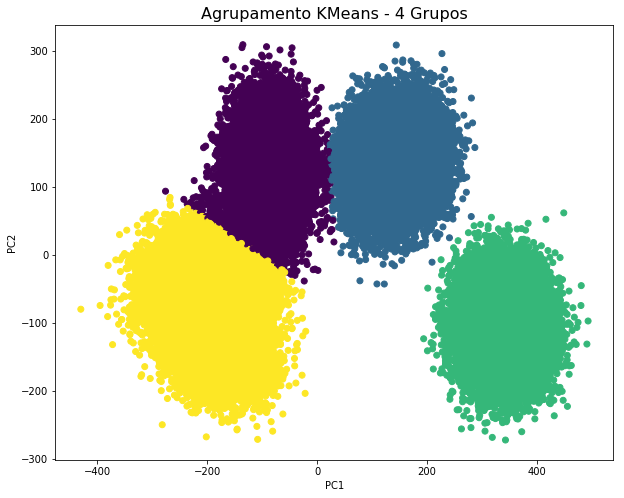

In [10]:
# Plota agrupamento gerado pelo KMeans
plt.figure(figsize = (10, 8))
plt.scatter(local_data_with_pca[:, 0], local_data_with_pca[:, 1], c = kmeans_pca.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agrupamento KMeans - 4 Grupos', size = 16)

Podemos confirmar, portanto, que os 2 grupos formados à direita realmente estão bem separados e portanto podem indicar 2 novas marcas especializadas para aqueles clientes e 2 grupos formados à esquerda, que podem ser sujeitos à avaliação de um especialista devido à sobreposição dos dados (separação dos grupos está muito "linear").

#### Silhueta

Nessa etapa já temos uma avaliação visual da partição, que parece ser condizente com a separação natural dos dados. Entretanto, é necessário garantir a qualidade da partição através de uma medida de avaliação.

Para avaliar a partição acima iremos utilizar o coeficiente de silhueta de cada grupos (cluster) formado pelo KMeans.

**Importante:** quanto maior o coeficiente de silhueta por grupo e maior a sua média, melhor.

Text(0.5, 1.0, 'Ajuste do Coeficiente de Silhueta por Cluster')

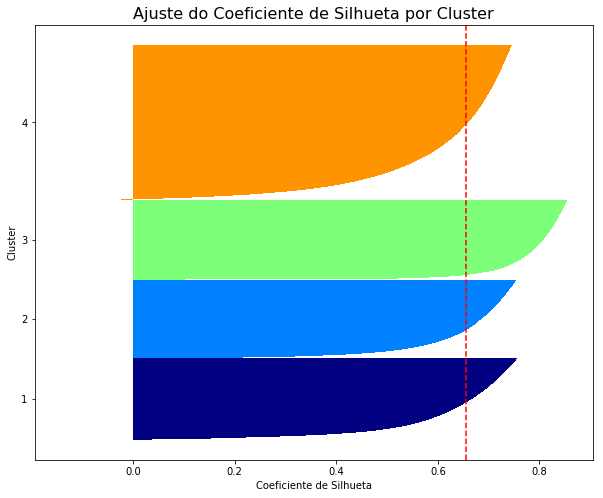

In [11]:
# Testa predição do modelo usando os dados de treino
kmeans_pca_predict = kmeans_pca.predict(local_data_with_pca)
cluster_labels = np.unique(kmeans_pca_predict)
n_clusters = cluster_labels.shape[0]
# Aplica o cálculo da silhueta para cada objeto usando distância de Manhattan
silhouette_vals = silhouette_samples(local_data_with_pca, kmeans_pca_predict, metric = 'manhattan')

plt.figure(figsize = (10, 8))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[kmeans_pca_predict == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
# Média de silhueta entre clusters
silhouette_avg = np.mean(silhouette_vals)

# Plota o gráfico de coeficiente de silhueta por cluster
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Coeficiente de Silhueta')
plt.ylabel('Cluster')
plt.title('Ajuste do Coeficiente de Silhueta por Cluster', size = 16)

A média do coeficiente de silhueta entre os grupos obtida foi de aproximadamente 0.65, sendo o pior ajuste do grupo que possui a maior quantidade de clientes. Visto a quantidade de clientes e visto que 3 grupos tiveram um ajuste muito próximo de 0.8, essa partição é portanto considerada boa e válidade para a divisão de marcas.

**Obs:** é possível observar que houve alguns pouquissímos clientes no grupo 4 que tiveram seu coeficiente de silhueta *negativo*, isso pode acontecer pois eles podem ser *outliers* que foram "puxados" para aquele grupo durante o cálculo do KMeans.

### Aglomerativo

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [12]:
# Redução do sampling devido a falta de memória disponível para execução
local_data = data.copy().sample(frac = .1)

#### Gerando o modelo com 4 grupos

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [13]:
######################## Apenas para visualização #############################
# Transforma os dados usando PCA
local_data_with_pca = PCA(n_components = 2).fit_transform(local_data)
# Aplica agrupamento aglomerativo sobre os dados usando complete linkage (dados com pca)
complete_linkage_pca = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit(local_data_with_pca)
###############################################################################

# Aplica agrupamento aglomerativo sobre os dados usando complete linkage
complete_linkage = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit(local_data)

# Salva a lista de indices dos objetos de cada cluster
c0_indices = getClusterIndices(0, complete_linkage.labels_)
c1_indices = getClusterIndices(1, complete_linkage.labels_)
c2_indices = getClusterIndices(2, complete_linkage.labels_)
c3_indices = getClusterIndices(3, complete_linkage.labels_)

print("Label 0: {}, correspondente a {:.2f}% dos dados.".format(len(c0_indices), (len(c0_indices)/len(complete_linkage.labels_))*100))
print("Label 1: {}, correspondente a {:.2f}% dos dados.".format(len(c1_indices), (len(c1_indices)/len(complete_linkage.labels_))*100))
print("Label 2: {}, correspondente a {:.2f}% dos dados.".format(len(c2_indices), (len(c2_indices)/len(complete_linkage.labels_))*100))
print("Label 3: {}, correspondente a {:.2f}% dos dados.".format(len(c3_indices), (len(c3_indices)/len(complete_linkage.labels_))*100))

Label 0: 2017, correspondente a 20.17% dos dados.
Label 1: 2790, correspondente a 27.90% dos dados.
Label 2: 2009, correspondente a 20.09% dos dados.
Label 3: 3184, correspondente a 31.84% dos dados.


#### Visualização

Text(0.5, 1.0, 'Agrupamento Aglomerativo - 4 Grupos')

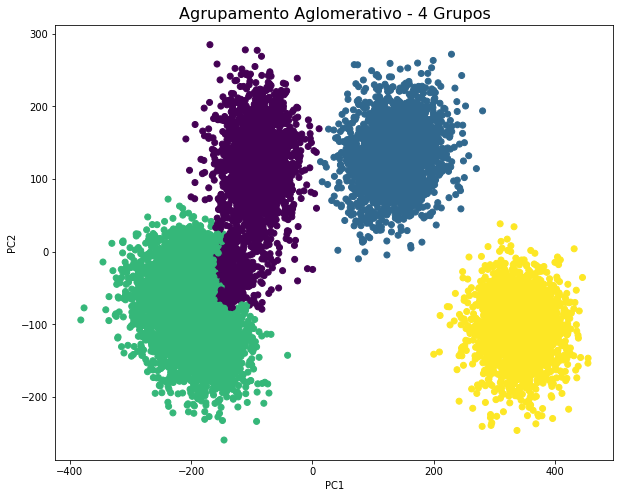

In [14]:
# Plota agrupamento gerado pelo complete linkage
plt.figure(figsize = (10, 8))
plt.scatter(local_data_with_pca[:, 0], local_data_with_pca[:, 1], c = complete_linkage_pca.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agrupamento Aglomerativo - 4 Grupos', size = 16)

Text(0.5, 1.0, 'Hierarquia Agrupamento Aglomerativo')

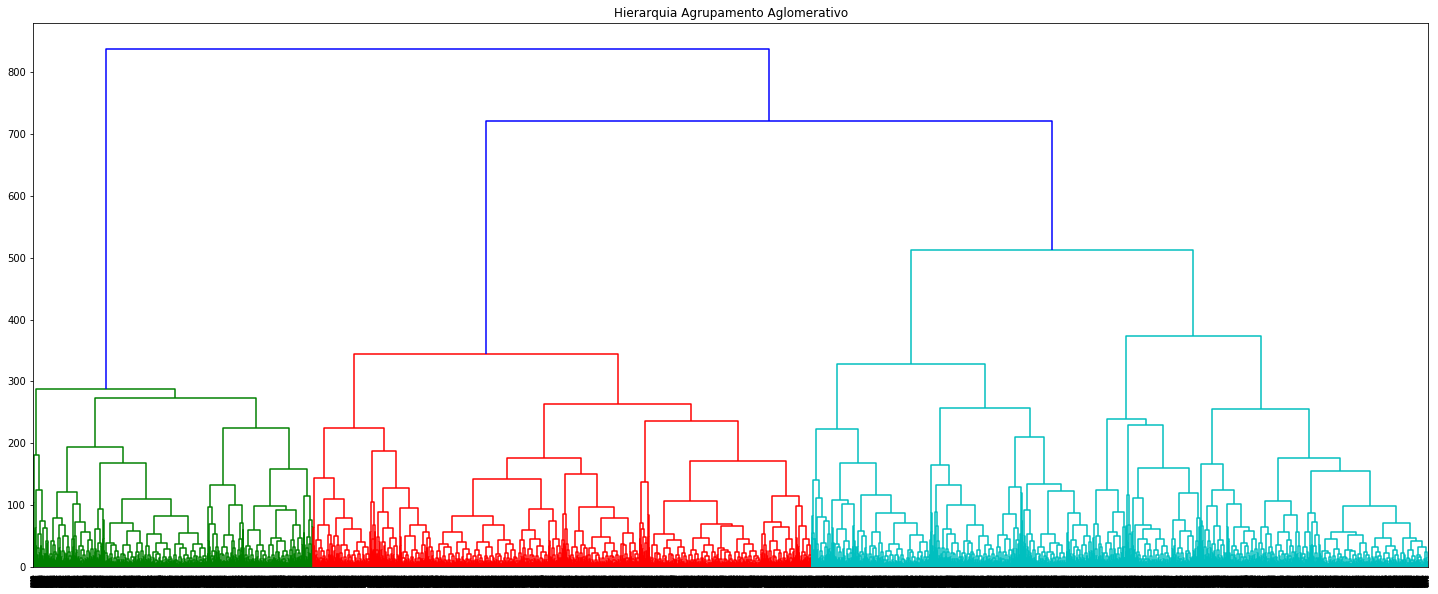

In [15]:
# Dendrograma
plt.figure(figsize = (25, 10))
dendo = dendrogram(linkage(local_data_with_pca, 'complete'))
plt.title('Hierarquia Agrupamento Aglomerativo', size = 20)

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

#### Silhueta

Text(0.5, 1.0, 'Ajuste do Coeficiente de Silhueta por Cluster')

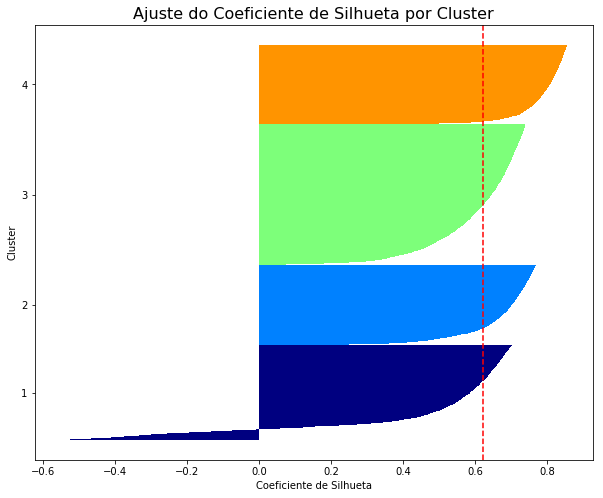

In [16]:
# Testa predição do modelo usando os dados de treino
complete_linkage_pca_predict = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit_predict(local_data_with_pca)
cluster_labels = np.unique(complete_linkage_pca_predict)
n_clusters = cluster_labels.shape[0]
# Aplica o cálculo da silhueta para cada objeto usando distância de Manhattan
silhouette_vals = silhouette_samples(local_data_with_pca, complete_linkage_pca_predict, metric='manhattan')

plt.figure(figsize = (10, 8))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[complete_linkage_pca_predict == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
# Média de silhueta entre clusters
silhouette_avg = np.mean(silhouette_vals)

# Plota o gráfico de coeficiente de silhueta por cluster
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Coeficiente de Silhueta')
plt.ylabel('Cluster')
plt.title('Ajuste do Coeficiente de Silhueta por Cluster', size = 16)

#### Gerando o modelo com 3 grupos

In [17]:
######################## Apenas para visualização #############################
# Transforma os dados usando PCA
local_data_with_pca = PCA(n_components = 2).fit_transform(local_data)
# Aplica agrupamento aglomerativo sobre os dados usando complete linkage (dados com pca)
complete_linkage_pca = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete').fit(local_data_with_pca)
###############################################################################

# Aplica agrupamento aglomerativo sobre os dados usando complete linkage
complete_linkage = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete').fit(local_data)

# Salva a lista de indices dos objetos de cada cluster
c0_indices = getClusterIndices(0, complete_linkage.labels_)
c1_indices = getClusterIndices(1, complete_linkage.labels_)
c2_indices = getClusterIndices(2, complete_linkage.labels_)

print("Label 0: {}, correspondente a {:.2f}% dos dados.".format(len(c0_indices), (len(c0_indices)/len(complete_linkage.labels_))*100))
print("Label 1: {}, correspondente a {:.2f}% dos dados.".format(len(c1_indices), (len(c1_indices)/len(complete_linkage.labels_))*100))
print("Label 2: {}, correspondente a {:.2f}% dos dados.".format(len(c2_indices), (len(c2_indices)/len(complete_linkage.labels_))*100))

Label 0: 5974, correspondente a 59.74% dos dados.
Label 1: 2017, correspondente a 20.17% dos dados.
Label 2: 2009, correspondente a 20.09% dos dados.


#### Visualização

Text(0.5, 1.0, 'Agrupamento Aglomerativo - 3 Grupos')

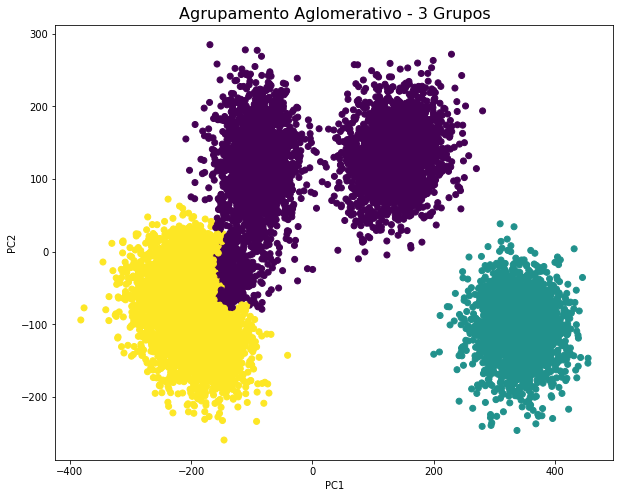

In [18]:
# Plota agrupamento gerado pelo complete linkage
plt.figure(figsize = (10, 8))
plt.scatter(local_data_with_pca[:, 0], local_data_with_pca[:, 1], c = complete_linkage_pca.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agrupamento Aglomerativo - 3 Grupos', size = 16)

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

#### Silhueta

Text(0.5, 1.0, 'Ajuste do Coeficiente de Silhueta por Cluster')

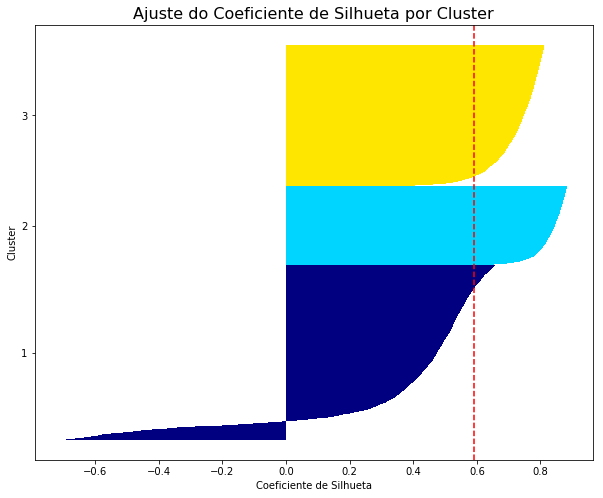

In [19]:
# Testa predição do modelo usando os dados de treino
complete_linkage_pca_predict = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete').fit_predict(local_data_with_pca)
cluster_labels = np.unique(complete_linkage_pca_predict)
n_clusters = cluster_labels.shape[0]
# Aplica o cálculo da silhueta para cada objeto usando distância de Manhattan
silhouette_vals = silhouette_samples(local_data_with_pca, complete_linkage_pca_predict, metric = 'manhattan')

plt.figure(figsize = (10, 8))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[complete_linkage_pca_predict == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
# Média de silhueta entre clusters
silhouette_avg = np.mean(silhouette_vals)

# Plota o gráfico de coeficiente de silhueta por cluster
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Coeficiente de Silhueta')
plt.ylabel('Cluster')
plt.title('Ajuste do Coeficiente de Silhueta por Cluster', size = 16)

## Resultados

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

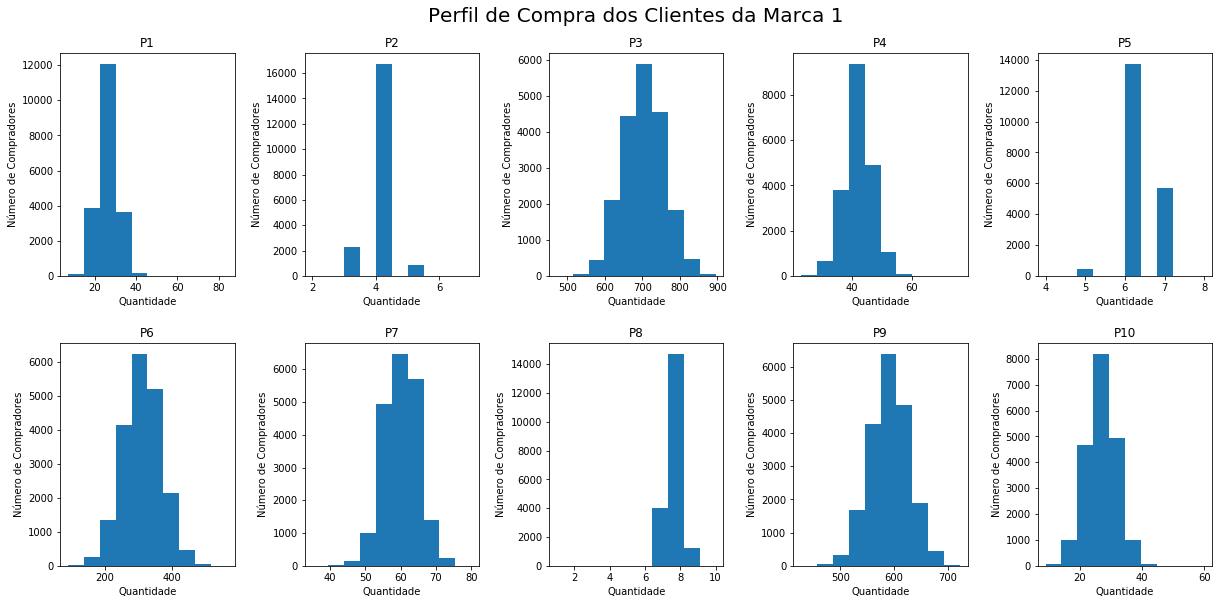

In [20]:
plt.figure(figsize = (20, 8))
for i in range (1, 11):
    plt.subplot(2, 5, i)
    plt.hist(c0_data['P' + str(i)])
    plt.xlabel('Quantidade')
    plt.ylabel('Número de Compradores')
    plt.title('P' + str(i))
plt.suptitle('Perfil de Compra dos Clientes da Marca 1', size = 20) 
plt.subplots_adjust(top = 0.9, bottom = 0.01, left = 0.1, right = 0.9, hspace = 0.3, wspace = 0.4)
plt.show()

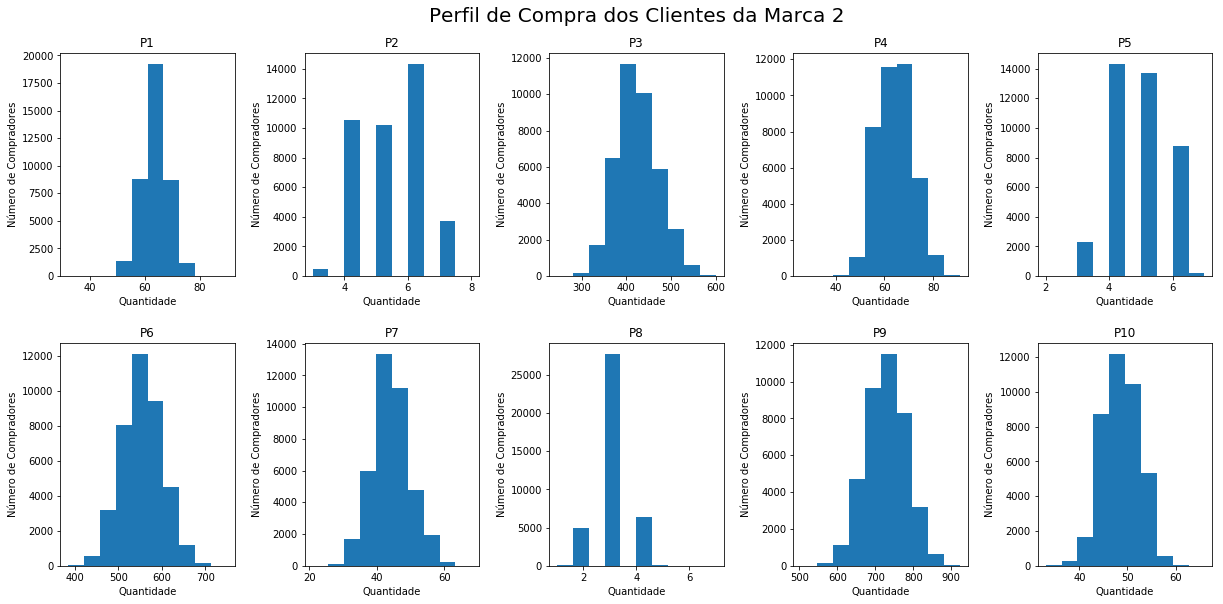

In [21]:
plt.figure(figsize = (20, 8))
for i in range (1, 11):
    plt.subplot(2, 5, i)
    plt.hist(c1_data['P' + str(i)])
    plt.xlabel('Quantidade')
    plt.ylabel('Número de Compradores')
    plt.title('P' + str(i))
plt.suptitle('Perfil de Compra dos Clientes da Marca 2', size = 20) 
plt.subplots_adjust(top = 0.9, bottom = 0.01, left = 0.1, right = 0.9, hspace = 0.3, wspace = 0.4)
plt.show()

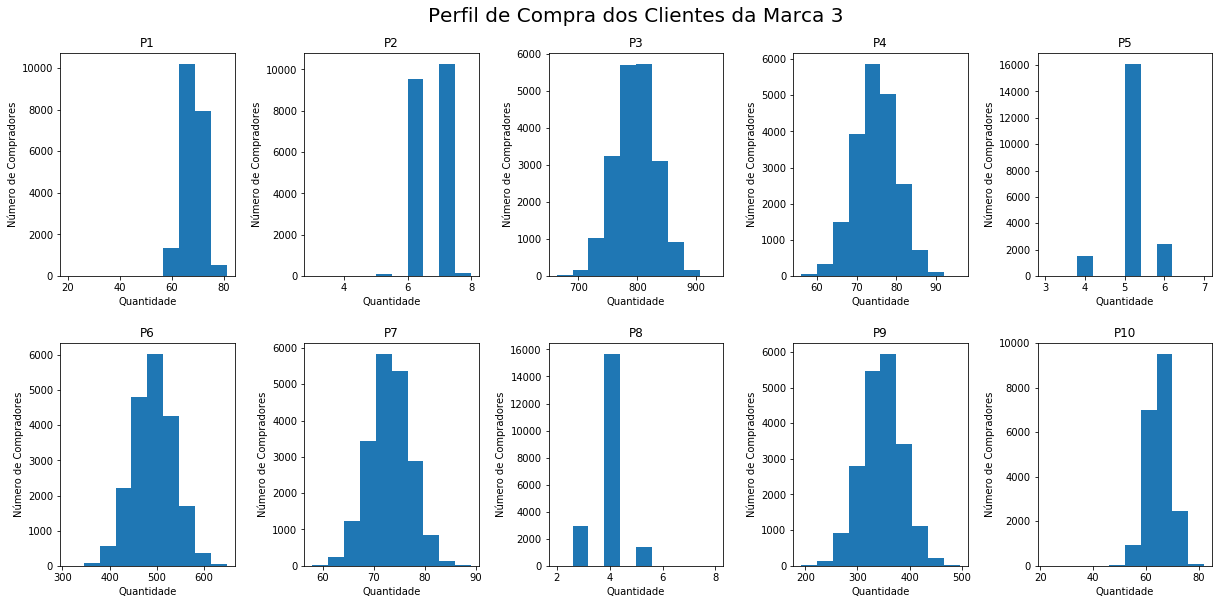

In [22]:
plt.figure(figsize = (20, 8))
for i in range (1, 11):
    plt.subplot(2, 5, i)
    plt.hist(c2_data['P' + str(i)])
    plt.xlabel('Quantidade')
    plt.ylabel('Número de Compradores')
    plt.title('P' + str(i))
plt.suptitle('Perfil de Compra dos Clientes da Marca 3', size = 20) 
plt.subplots_adjust(top = 0.9, bottom = 0.01, left = 0.1, right = 0.9, hspace = 0.3, wspace = 0.4)
plt.show()

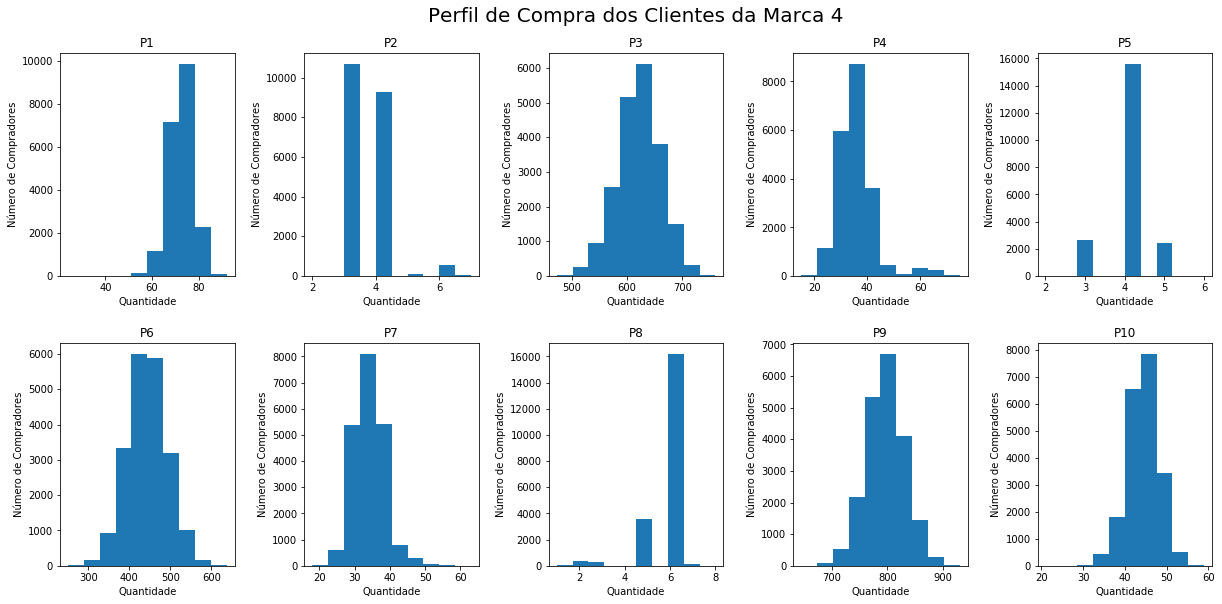

In [23]:
plt.figure(figsize = (20, 8))
for i in range (1, 11):
    plt.subplot(2, 5, i)
    plt.hist(c3_data['P' + str(i)])
    plt.xlabel('Quantidade')
    plt.ylabel('Número de Compradores')
    plt.title('P' + str(i))
plt.suptitle('Perfil de Compra dos Clientes da Marca 4', size = 20) 
plt.subplots_adjust(top = 0.9, bottom = 0.01, left = 0.1, right = 0.9, hspace = 0.3, wspace = 0.4)
plt.show()